importing libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

data collection and preprocessing

In [ ]:
#load data from csv file to pandas dataframe
data=pd.read_csv('/content/titanic.csv')

In [ ]:
#printing first 5 data contents
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
#total number of rows and columns
data.shape

(418, 12)

In [ ]:
#more information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [ ]:
#checking number of missing values in each column
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

handling missing values

In [ ]:
#drop 'Cabin' column
data=data.drop(columns='Cabin', axis=1)

In [ ]:
#replacing missing values in 'Age' column with mean age value
data['Age'].fillna(data['Age'].mean(), inplace=True)

In [ ]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64

In [ ]:
#finding the embarked value of the row that has missing fare
missing_fare_embarked=data.loc[data['Fare'].isnull(), 'Embarked'].values[0]
missing_fare_embarked

'S'

In [ ]:
#finding average fare for people embarked from S and replacing it in missing value
filtered_data = data[data['Embarked'] == missing_fare_embarked]
avg_fare = filtered_data['Fare'].mean()
data.loc[data['Fare'].isnull(),'Fare']=avg_fare

In [ ]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

data analysis

In [ ]:
#statistical measures of data
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.609493
std,120.810458,0.481622,0.841838,12.634534,0.896760,0.981429,55.841672
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,23.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,30.272590,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,35.750000,1.000000,0.000000,31.471875
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [ ]:
#finding number of people survived and not survived
data['Survived'].value_counts()

0    266
1    152
Name: Survived, dtype: int64

data visualization

In [ ]:
sns.set()

<Axes: xlabel='Survived', ylabel='count'>

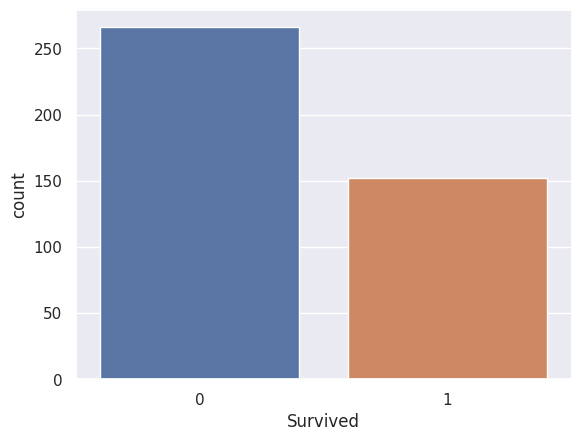

In [ ]:
#making a count plot for 'Survived' column
sns.countplot(x='Survived', data = data)

<Axes: xlabel='Sex', ylabel='count'>

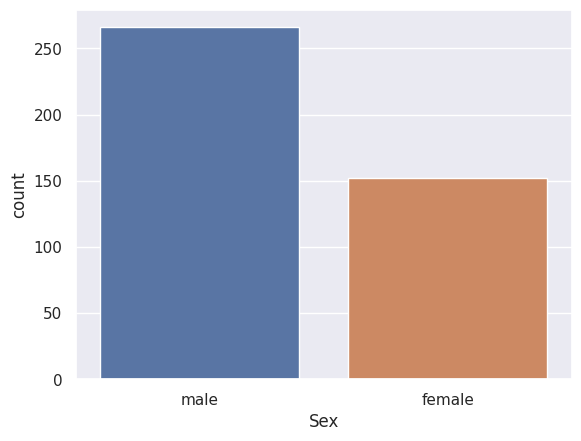

In [ ]:
#making a count plot for 'Sex' column
sns.countplot(x='Sex', data = data)

<Axes: xlabel='Sex', ylabel='count'>

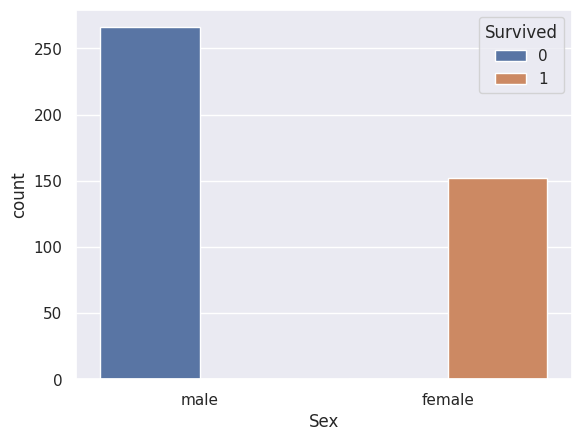

In [ ]:
#count of people survived based on gender
sns.countplot(x='Sex',hue='Survived',data=data)

the above plot implies that no male survived and all female survived

In [ ]:
#just to verify numerically
female_survived_count = data[(data['Sex'] == 'female') & (data['Survived'] == 1)].shape[0]
female_survived_count

152

From the analysis and the count the data tells that all female survived and no male survived which implies Sex is a strong predictor for survival. However for the model to be more efficient consideration of other relevant information

In [ ]:
data['Sex'].value_counts()

male      266
female    152
Name: Sex, dtype: int64

In [ ]:
data['Embarked'].value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

In [ ]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


seperating features

In [ ]:
data['Sex'].replace({'female': 1, 'male': 0}, inplace=True)
data['Embarked'].replace({'C': 0, 'Q':1,'S': 2}, inplace=True)

In [ ]:
X = data.drop(columns={'PassengerId','Name','Ticket','Survived'},axis=1)
Y = data['Survived']

In [ ]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,34.5,0,0,7.8292,1
1,3,1,47.0,1,0,7.0000,2
2,2,0,62.0,0,0,9.6875,1
3,3,0,27.0,0,0,8.6625,2
4,3,1,22.0,1,1,12.2875,2


In [ ]:
Y.head()

0    0
1    1
2    0
3    0
4    1
Name: Survived, dtype: int64

In [ ]:
#splitting data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

Model Training

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

model evaluation

In [ ]:
#checking the accuracy on training data
X_train_predictions=model.predict(X_train)
print(X_train_predictions)

[0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0
 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 1 0 0 1 0 0 1 0 0 1 1 1 1 0 0 1 1 1 0 0 1 0
 0 0 0 1 1 1 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0
 1 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 1 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1
 0 1 1 1 1 1 1 0 1 1 1 1 0 0 0 1 0 1 0 0 1 1 1 0 0 0 1 1 0 0 1 0 0 0 0 0 1
 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 1 1 0 1 1 0 1 1 0 0 1 0 1 0 0
 0 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1 1 0 1 0 1 0 1 0 0 0 0 0 0 1 1 0
 0 0 0 1 0 0 1 0 0 1 1 1 0 0 0 1 0 0 1 1 0 1 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 1 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0 1 0 0 1 1 1 0 0 0 1 0 0 0 0
 0]


In [ ]:
accuracy_score(y_train,X_train_predictions)

1.0

In [ ]:
#checking the accuracy on testing data
y_pred = model.predict(X_test)
accuracy_score(y_test,y_pred)

1.0

The accuracy on both training and testing data is 1.0